In [32]:
from network_hw1 import *
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix, lil_matrix
import matplotlib.pyplot as plt
from datetime import datetime

Average distance:  7.139276797360465
Average Clustering coefficient:  0.0003379223282393842
Degree exponent (gamma):  3.1423351338124776
Normalizing factor (c):  297.31891823485637
Comparison of natural cutoff vs real kmax:  76.59501784516586 [72]


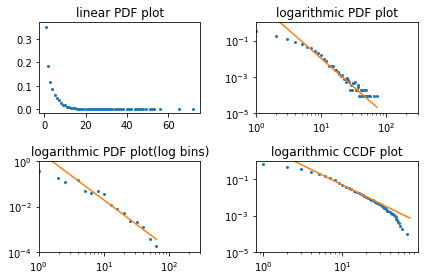

In [33]:
data = np.genfromtxt("p2p-Gnutella04.txt")

# 1 is added because in the csr_matrix function 0 as a node is not accepted
N = int(np.max(data)) + 1

# Kmin has been derived from the data
kmin = 10

#defining a sparse matrix, this is way faster than a np matrix
A = csr_matrix((np.ones(len(data)), (data[:, 0], data[:, 1])), shape = (N, N), dtype = np.int32)
#  (0, 1184)	1 sample output
# It shows that there is a link between 0th and 1184th nodes


#getting the degrees of the matrix
degrees = get_degrees(A, "out")

#getting the average of degrees
average_degree = np.average(degrees)

#getting the diameter of network
average_distance = get_average_distance(N, average_degree)
print("Average distance: ", average_distance)

#getting the clustering coefficient
average_clustering_coef = get_average_clustering_coef(average_degree, N)
print("Average Clustering coefficient: ", average_clustering_coef)
    
#getting the pdf of the nodes degrees
uniques, pdf = get_neighbours_pdf(degrees)

#getting the cumulative distribution function
cumpdf = ccdf(pdf)

#estimating the parameters to be used in the power law
gamma, c = estimate_power_law(degrees, kmin) # gamma = 3.14
C = c*cumpdf[np.where(uniques == kmin)]
fig, axs = plt.subplots(2, 2)
print("Degree exponent (gamma): ", gamma)
print("Normalizing factor (c): ", c)

#getting the natural cutoff,expected kmax, of a network
natural_cutoff = get_natural_cutoff(N, gamma)
print("Comparison of natural cutoff vs real kmax: ", natural_cutoff, max(degrees))

#plotting the pdf
axs[0, 0].set_title("linear PDF plot")
axs[0, 0].plot(uniques, pdf, marker='o', linestyle='None', ms = 2)


#plotting the pdf and the linear fit
axs[0, 1].set_title("logarithmic PDF plot")
axs[0, 1].set_ylim(1e-5, 1)
axs[0, 1].set_xlim(1, 3*10e1)
axs[0, 1].loglog(uniques, pdf, marker='o', linestyle='None', ms=2)
axs[0, 1].loglog(np.arange(1, np.max(uniques)), C * (np.arange(1, np.max(uniques)) ** -gamma))

#plotting the linear binning pdf
axs[1, 0].set_title("logarithmic PDF plot(log bins)")
axs[1, 0].set_xlim(1, 3*10e1)
axs[1, 0].set_ylim(1e-4, 1)
x, y = log_binning_pdf(0.1, degrees)
axs[1, 0].loglog(x, y, marker='o', linestyle='None', ms = 2)
axs[1, 0].loglog(x, C / (gamma - 1) * x ** (1 - gamma) * (1 - (x[1] / x[0]) ** (1 - gamma)))


#plotting the ccdf and the corresponding linear fit
axs[1, 1].set_title("logarithmic CCDF plot")
axs[1, 1].set_ylim((1e-5, 1))
axs[1, 1].loglog(uniques, ccdf(pdf), marker='o', linestyle='None', ms = 2)
axs[1, 1].loglog(np.arange(1, np.max(uniques)), C * np.arange(1, np.max(uniques))**(1-gamma)/(gamma-1))

#used to prevent label overlapping
fig.tight_layout()
plt.show()

In [34]:
'''
#took too much time run, inefficient algorithm
def get_clustering_coef(A, n):
    neighbors = []
    for i in range(A.shape[0]):
        if A[n][i] == 1:
            neighbors.append(i)
    print("neighbors: ", neighbors)
    counter = 0
    for j in neighbors:
        print(j)
        for k in neighbors:
            print(k)
            if A[j][k] == 1:
                counter += 1
    print("counter: ", counter)
    return counter



coefs = []
for i in range(N):
    coefs.append(get_clustering_coef(A, i))
'''

'\n#took too much time run, inefficient algorithm\ndef get_clustering_coef(A, n):\n    neighbors = []\n    for i in range(A.shape[0]):\n        if A[n][i] == 1:\n            neighbors.append(i)\n    print("neighbors: ", neighbors)\n    counter = 0\n    for j in neighbors:\n        print(j)\n        for k in neighbors:\n            print(k)\n            if A[j][k] == 1:\n                counter += 1\n    print("counter: ", counter)\n    return counter\n\n\n\ncoefs = []\nfor i in range(N):\n    coefs.append(get_clustering_coef(A, i))\n'

Assortativity factor out-out 0.015517942244411307
Assortativity factor in-out -0.017327000422701185
Assortativity factor out-in -0.02815340493564837
Assortativity factor in-in -0.007470475855859149


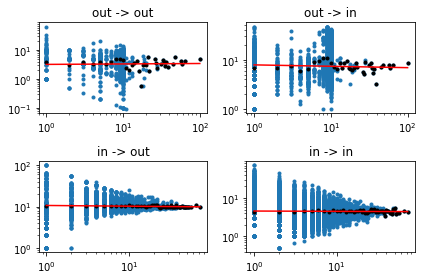

In [35]:
data = np.genfromtxt("p2p-Gnutella04.txt")
N = int(np.max(data)) + 1

raw_A = csr_matrix((np.ones(len(data)), (data[:, 1], data[:, 0])), shape = (N, N), dtype = np.int32)
A = clean_network(raw_A)

p_oo, unique_oo, knn_oo, temp_knn_oo = get_assortativity_value(A, "out", "out")
p_oi, unique_oi, knn_oi, temp_knn_oi = get_assortativity_value(A, "out", "in")
p_io, unique_io, knn_io, temp_knn_io = get_assortativity_value(A, "in", "out")
p_ii, unique_ii, knn_ii, temp_knn_ii = get_assortativity_value(A, "in", "in")


out_degrees = get_degrees(A, direction="out")
out_degrees = remove_zeros(out_degrees)
in_degrees = get_degrees(A, direction="in")
in_degrees = remove_zeros(in_degrees)

print("Assortativity factor out-out", p_oo[0])
print("Assortativity factor in-out", p_io[0])
print("Assortativity factor out-in", p_oi[0])
print("Assortativity factor in-in", p_ii[0])

fig, ax = plt.subplots(2, 2)
ax[0,0].loglog(out_degrees, temp_knn_oo, marker=".", linestyle='None')
ax[0,0].loglog(unique_oo, knn_oo, marker = '.', linestyle='None', c='black')
ax[0,0].loglog(unique_oo, np.exp(p_oo[1] + np.log(unique_oo)*p_oo[0]), c = 'r')
ax[0,0].set_title("out -> out")

ax[0,1].loglog(out_degrees, temp_knn_oi, marker=".", linestyle='None')
ax[0,1].loglog(unique_oi, knn_oi, marker = '.', linestyle='None', c='black')
ax[0,1].loglog(unique_oi, np.exp(p_oi[1] + np.log(unique_oi)*p_oi[0]), c = 'r')
ax[0,1].set_title("out -> in")

ax[1,0].loglog(in_degrees, temp_knn_io, marker=".", linestyle='None')
ax[1,0].loglog(unique_io, knn_io, marker = '.', linestyle='None', c='black')
ax[1,0].loglog(unique_io, np.exp(p_io[1] + np.log(unique_io)*p_io[0]), c = 'r')
ax[1,0].set_title("in -> out")

ax[1,1].loglog(in_degrees, temp_knn_ii, marker=".", linestyle='None')
ax[1,1].loglog(unique_ii, knn_ii, marker = '.', linestyle='None', c='black')
ax[1,1].loglog(unique_ii, np.exp(p_ii[1] + np.log(unique_ii)*p_ii[0]), c = 'r')
ax[1,1].set_title("in -> in")

#used to prevent label overlapping
fig.tight_layout()
plt.show()